In [ ]:
import cv2
from google.colab.patches import cv2_imshow

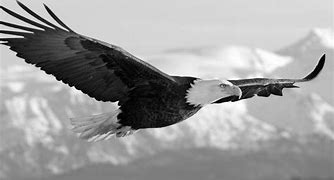

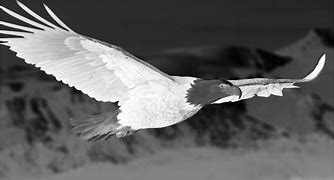

In [ ]:
img = cv2.imread('/content/OIP.jpg',cv2.IMREAD_GRAYSCALE)

if img is None:
  print("Error: Unable to load the image.")
else:
    negative_img = 255 - img

    cv2_imshow(img)
    cv2_imshow(negative_img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

Original image and its negative:


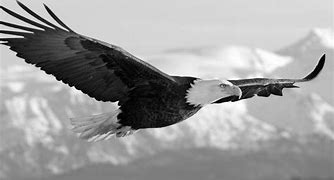

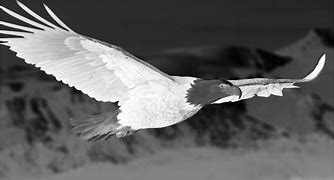

Enter the threshold value: 100


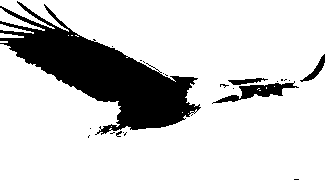

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/OIP.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Unable to load the image.")
else:
    m, n = img.shape

    L = img.max()

    img_neg = L - img

    cv2.imwrite('/content/OIP_negative.jpg', img_neg)

    print('Original image and its negative:')
    cv2_imshow(img)
    cv2_imshow(img_neg)

    T = int(input('Enter the threshold value: '))

    img_thresh = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if img[i, j] < T:
                img_thresh[i, j] = 0
            else:
                img_thresh[i, j] = 255

    cv2.imwrite('birdthreshold.jpg', img_thresh)

    cv2_imshow(img_thresh)


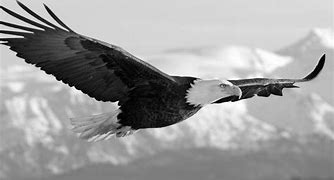

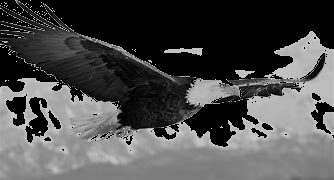

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/OIP.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Unable to load the image.")
else:
  lower_threshold = 100
  upper_threshold = 200

  background_mask = cv2.inRange(img,0,lower_threshold)
  slicing_mask = cv2.inRange(img,lower_threshold,upper_threshold)
  background = cv2.bitwise_and(img,img,mask=background_mask)
  sliced_region = cv2.bitwise_and(img,img,mask=slicing_mask)
  result_img = cv2.add(background,sliced_region)
  cv2_imshow(img)
  cv2_imshow(result_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

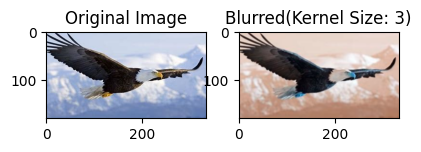

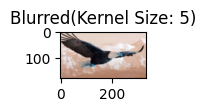

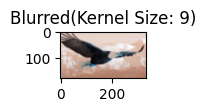

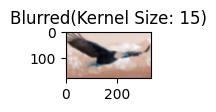

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/OIP.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel_sizes = [3,5,9,15]

plt.figure(figsize=(12,3))
plt.subplot(1,len(kernel_sizes) +1,1)
plt.imshow(img_rgb)
plt.title('Original Image')

for i, kernel_size in enumerate(kernel_sizes):
  blurred_img = cv2.GaussianBlur(img, (kernel_size, kernel_size),0)
  plt.subplot(1, len(kernel_sizes)+1, i + 2)
  plt.imshow(blurred_img)
  plt.title(f'Blurred(Kernel Size: {kernel_size})')
  plt.show()